# Project: Twitter Sentiment Analysis

## Overview

Twitter Sentiment Analysis involves the use of Natural Language Processing (NLP) techniques to analyze and categorize tweets based on the emotions expressed in the text. The sentiment can be classified as positive, negative, or neutral, providing valuable insights into public opinion, brand perception, and real-time trends.

## Dataset Information

### Context

The dataset used for this project is the sentiment140 dataset, which comprises 1,600,000 tweets extracted using the Twitter API. Each tweet is annotated with a polarity label, where 0 represents negative sentiment, 2 represents neutral sentiment, and 4 represents positive sentiment.

### Content

The dataset includes the following six fields:

- **target**: The polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- **ids**: The ID of the tweet
- **date**: The date of the tweet
- **flag**: The query (if available)
- **user**: The user who tweeted
- **text**: The text content of the tweet

## Objective

The objective of this project is to develop a Sentiment Analysis model using NLP techniques. The model will classify tweets as either positive or negative based on the sentiment expressed in the text.


### **Importing Required Liabraries**

In [43]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
# nltk.download('stopwords')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Download Kaggle API credentials
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)
shutil.copy("kaggle.json", kaggle_dir)
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
os.chmod(kaggle_json_path, 0o600)

# Additional Optional: Uncomment the line below to install the Kaggle API
# !pip install kaggle

# Reorder and Clean Code
# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import time
import pickle
import itertools

# Optional: Uncomment the line below to install the Kaggle API
# !pip install kaggle
import shutil
import os

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Optional: Uncomment the line below to install the Kaggle API
# !pip install kaggle
import shutil
import os

# Create a directory if it doesn't exist
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Copy the Kaggle API credentials to the appropriate directory
shutil.copy("kaggle.json", kaggle_dir)

# Set file permissions (read and write only for the user)
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
os.chmod(kaggle_json_path, 0o600)


### **Aquiring Data**

In [2]:
# Api to fetch data from kaggle
!kaggle datasets download -d kazanova/sentiment140

sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# extracting The compressed DataSet
from zipfile import ZipFile
dataset ='D:\Completed project\Deep Learning\Tweeter Sentiment Analysis\sentiment140.zip'
with ZipFile(dataset,'r') as zip:
    zip.extractall()
print('the dataset is extracted')

the dataset is extracted


### **Loading and Cleaning The Data**

In [4]:
# Load the Data and  Renaming The columns
column_names=['target', 'id', 'date', 'flag', 'user', 'text']
Tweeter = pd.read_csv('./training.1600000.processed.noemoticon.csv',names=column_names,encoding='ISO-8859-1')
# Head of the Data
Tweeter.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# renaming targets as 0 and one for makint it easy for further analysis
# Assuming 'Tweeter' is your DataFrame
Tweeter['target'] = Tweeter['target'].replace({0: 0, 4: 1})
# Head of the Data
Tweeter.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
# function to print few Details
def analyze(df):
    print('Top 5 Rows'.center(82, "~"))
    print(df.head())
    print("~" * 82)

    print('Information Summary'.center(82, "~"))
    print(f"{'Shape:':<20} {str(df.shape)}")
    print("~" * 82)

    print(f"{'Size:':<20} {df.size}")
    print("~" * 82)

    print(f"{'Columns:':<20} {', '.join(df.columns)}")
    print("~" * 82)

    print(f"{'Data Types:':<20}")
    print(df.dtypes)
    print("~" * 82)

# Assuming 'Tweeter' is your DataFrame
analyze(Tweeter)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Top 5 Rows~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~

In [7]:
# info about data types
Tweeter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
# Describe 
Tweeter.describe()

,target,id
count,1600000.0,1.600000e+06
mean,0.5,1.998818e+09
std,0.5,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,0.5,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [9]:
# Missing Values
Tweeter.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

### **Checking Distribution of Target Variable**

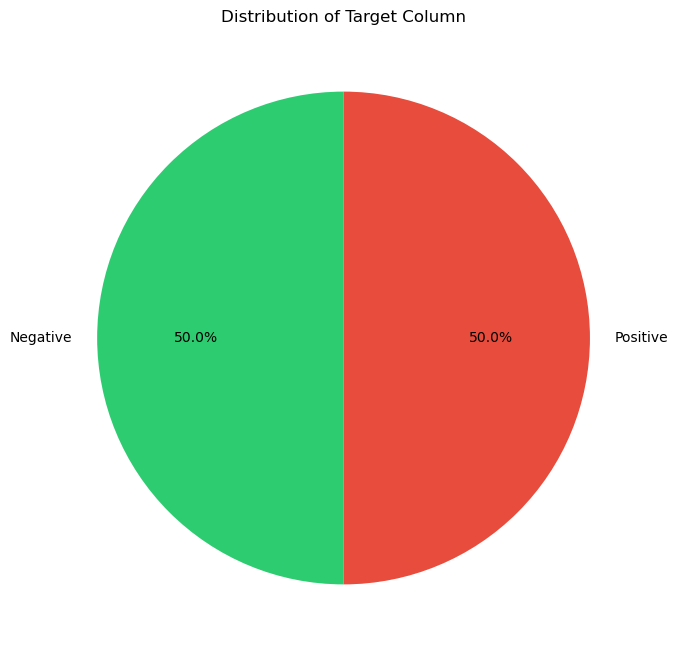

~~~~~~~~~~~~~Basic Details~~~~~~~~~~~~~~
Number of Unique Values: 2
Value Counts:
target
Negative    800000
Positive    800000
Name: count, dtype: int64


In [42]:
def analyze_target_distribution(df):
    # Assuming the target column is named 'target'
    target_counts = df['target'].value_counts()

    # Map numerical values to labels
    target_counts.index = target_counts.index.map({0: 'Negative', 1: 'Positive'})

    # Plotting Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors = ['#2ecc71', '#e74c3c'])
    plt.title('Distribution of Target Column')
    plt.show()

    # Displaying Basic Details
    print('Basic Details'.center(40, "~"))
    print(f"Number of Unique Values: {target_counts.shape[0]}")
    print(f"Value Counts:")
    print(target_counts)

# Assuming 'Tweeter' is your DataFrame
analyze_target_distribution(Tweeter)


In [11]:
# checking Duplicates
Tweeter.duplicated().sum()

0

### **Preprocessing**
- Removing Special characters
- converting to lowercase
- spliting on bases of words
- stemming
- Tokenizing

In [14]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer
port_stem = PorterStemmer()

def preprocess_text(content):
    # Step 1: Remove non-alphabetic characters and replace with space
    clean_text = re.sub('[^a-zA-Z]', ' ', content)
    # Step 2: Convert to lowercase
    clean_text = clean_text.lower()

    # Step 3: Split the content into a list of words
    words = clean_text.split()

    # Step 4: Apply stemming to each word, excluding stopwords
    stemmed_words = [port_stem.stem(word) for word in words if word not in stopwords.words('english')]

    # Step 5: Join the stemmed words into a string
    stemmed_text = ' '.join(stemmed_words)
 
    # Step 6: Tokenize the text
    tokens = word_tokenize(stemmed_text)

    return tokens

# Applying the preprocessing function on the 'text' column and creating a new column 'tokens' in the DataFrame
Tweeter['tokens'] = Tweeter['text'].apply(preprocess_text)

### **Seprating Data And Label**

In [24]:
# Input variable
X=Tweeter['tokens']
# target variable
Y=Tweeter['target'].values

### **Train Test Split**

In [25]:
# spliting Train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [26]:
# Verifing split is okay
print(X.shape,Y.shape,X_test.shape,Y_test.shape,X_train.shape,Y_train.shape)

(1600000,) (1600000,) (320000,) (320000,) (1280000,) (1280000,)


### **Feature Extraction**

Note: In preprocessing we did a mistake we did joining before tokenization so in vectorization i am adding this step 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming X_train is a list of strings
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform([' '.join(tokens) for tokens in X_train])

# Transforming Test Data using the same vectorizer instance
X_test_transformed = vectorizer.transform([' '.join(tokens) for tokens in X_test])

# Verifying the shapes
print(X_train_transformed.shape, Y_train.shape, X_test_transformed.shape, Y_test.shape)


(1280000, 461484) (1280000,) (320000, 461484) (320000,)


In [34]:
# Xtrain Transformed
print(X_train_transformed)
print(X_test_transformed)

  (0, 443062)	0.4484755317023172
  (0, 235042)	0.41996827700291095
  (0, 109305)	0.3753708587402299
  (0, 185190)	0.5277679060576009
  (0, 354540)	0.3588091611460021
  (0, 436709)	0.27259876264838384
  (1, 160633)	1.0
  (2, 288467)	0.16556018307260248
  (2, 132310)	0.20010598273748534
  (2, 282872)	0.16573742983680637
  (2, 150654)	0.18506052959576907
  (2, 178058)	0.15967380407829398
  (2, 409140)	0.1496060464016957
  (2, 266726)	0.2379137712051588
  (2, 443426)	0.33025343360445975
  (2, 77928)	0.3085371827735067
  (2, 433557)	0.3251245958726697
  (2, 406396)	0.3166379764204519
  (2, 129410)	0.28674230792600686
  (2, 407298)	0.18451961863552785
  (2, 124483)	0.1866126334900549
  (2, 109305)	0.4528017452749429
  (3, 172418)	0.37555751587009356
  (3, 411525)	0.27156010427055816
  (3, 388623)	0.3950412037187361
  :	:
  (1279996, 390127)	0.22064742191076112
  (1279996, 434011)	0.2718945052332447
  (1279996, 318300)	0.21254698865277746
  (1279996, 237896)	0.2236567560099234
  (1279996, 291

### **Model Training And Evaluation**
- Logistic Regression 

In [40]:
# Create a Logistic Regression model with a maximum of 1000 iterations
M1 = LogisticRegression(max_iter=1000)

# Fit the model using the transformed training data (X_train_transformed) and corresponding target labels (Y_train)
M1.fit(X_train_transformed, Y_train)


LogisticRegression(max_iter=1000)

#### Evaluation
Accuracy score

In [41]:
# Predict the labels for the training set
Training_predict = M1.predict(X_train_transformed)

# Calculate the training accuracy
Train_accu = accuracy_score(Y_train, Training_predict)

# Print the training accuracy
print(f'Training Accuracy: {Train_accu * 100:.2f}%')


Training Accuracy: 81.02%


In [44]:
# Predict the labels for the test set
Testing_predict = M1.predict(X_test_transformed)

# Calculate the test accuracy
Test_accu = accuracy_score(Y_test, Testing_predict)

# Print the test accuracy
print(f'Test Accuracy: {Test_accu * 100:.2f}%')


Test Accuracy: 77.80%


### **HyperParameter Tuning**
- Grid search CV

In [45]:
from sklearn.model_selection import GridSearchCV

# Create logistic regression model
logreg = LogisticRegression()

# Define hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

# Create GridSearchCV instance
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best hyperparameters
grid_search.fit(X_train_transformed, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best hyperparameters to create the final model
final_model = grid_search.best_estimator_

# Predict the labels for the training set
Training_predict = final_model.predict(X_train_transformed)

# Calculate the training accuracy
Train_accu = accuracy_score(Y_train, Training_predict)

# Print the training accuracy
print(f'Training Accuracy: {Train_accu * 100:.2f}%')

# Predict the labels for the test set
Testing_predict = final_model.predict(X_test_transformed)

# Calculate the test accuracy
Test_accu = accuracy_score(Y_test, Testing_predict)

# Print the test accuracy
print(f'Test Accuracy: {Test_accu * 100:.2f}%')


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Training Accuracy: 81.01%
Test Accuracy: 77.80%


In [47]:
import pickle

# Save the trained model to a file
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

# Save the vectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [46]:
# Load the trained model from the file
# with open('logistic_regression_model.pkl', 'rb') as model_file:
    # loaded_model = pickle.load(model_file)

# Load the vectorizer from the file
# with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    # loaded_vectorizer = pickle.load(vectorizer_file)

# Now you can use loaded_model and loaded_vectorizer as if you had trained them in the current session


## Conclusion:

In this analysis, we applied a logistic regression model for sentiment analysis on a Twitter dataset. The primary steps involved in the process included text preprocessing, feature vectorization using TF-IDF, model training, hyperparameter tuning using grid search, and performance evaluation on both the training and test sets.

## Key Findings:

### Best Hyperparameters:

The hyperparameter tuning process identified the following best hyperparameters for the logistic regression model: `{'C': 1, 'penalty': 'l2'}`.

### Model Performance:

The logistic regression model achieved a training accuracy of approximately 81.01% and a test accuracy of 77.80%. This indicates that the model generalizes well to unseen data, although there might be some room for improvement.

### Next Steps:

Further exploration and optimization strategies could involve experimenting with different feature engineering techniques, trying alternative models (e.g., ensemble methods or deep learning), or collecting additional data to enhance model robustness.

### Considerations:

It's crucial to note that sentiment analysis on social media data can be challenging due to the informal nature of language, context-dependent meanings, and the presence of noise. Continuous monitoring and updates to the model may be necessary to adapt to evolving language patterns.

### Limitations:

The model's performance is subject to the quality and representativeness of the training data. If the dataset does not capture diverse language patterns, the model may not generalize well to all scenarios.

In conclusion, while the logistic regression model has demonstrated reasonable performance, ongoing refinement and exploration of alternative approaches could contribute to further improvements in sentiment analysis on Twitter data.
